In [1]:
from FEA.FEA import *

assembly_mat_1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
])

assembly_mat_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
])

element1 = FrameElement(assembly_mat_1, 200e9, 5e-4, 10, 1e-5, -90)
element2 = FrameElement(assembly_mat_2, 200e9, 5e-4, 10, 1e-5, 0)

Q = np.array([[0], [140e3], [0]])

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force)

[[ 2.70967742e+03]
 [ 3.31839778e-13]
 [-1.80645161e+04]
 [-2.70967742e+03]
 [-3.31839778e-13]
 [ 4.51612903e+04]]
[[ 2709.67741935]
 [ 9483.87096774]
 [94838.70967742]
 [-2709.67741935]
 [-9483.87096774]
 [    0.        ]]


### Display deflections

Basic, only 3 nodes, not full deflections shown

[[ 0.01354839]
 [ 0.00316129]
 [-0.00158065]]


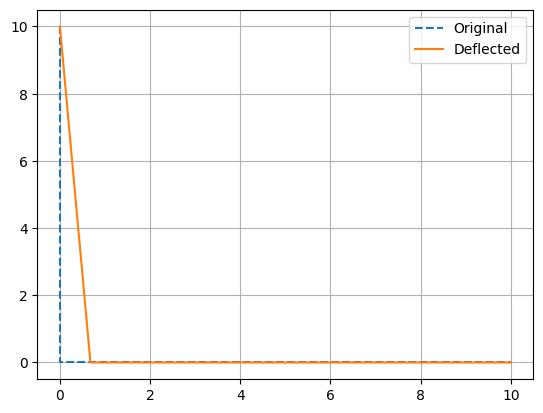

In [2]:
import matplotlib.pyplot as plt

magnitude = 50

original = np.array([[0, 10], [0, 0], [10, 0]])

print(structure.q)

deflected = np.array([[0, 10], [structure.q[0][0] * magnitude, 0], [10, 0]])

plt.plot(original[:, 0], original[:, 1], '--', label="Original")
plt.plot(deflected[:, 0], deflected[:, 1], label="Deflected")

plt.grid()
plt.legend()
plt.show()

### Display full nodal deflections

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


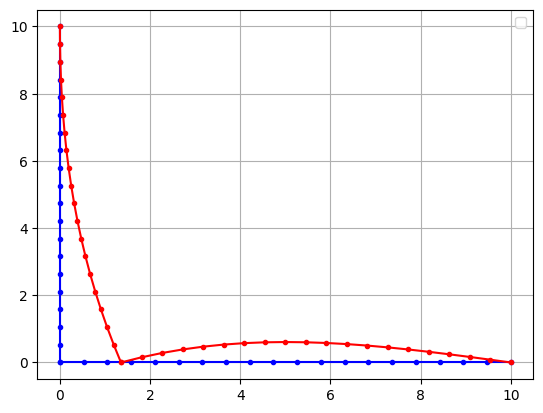

In [3]:
nodes = np.array([
    [0, 10],
    [0, 0],
    [10, 0]
])

structure.plot_structure(nodes, 100, 20)